In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np

import sys
sys.path.append('/home/jovyan/normalizing-cdr-accounting/scripts')

from process_raw_hector_output import *
from condense_hector_output import *

# Load data

In [2]:
input_path='/home/jovyan/normalizing-cdr-accounting/data/postprocessed-hector/netcdfs/'
DAC_emissionsDriven=xr.open_dataset(input_path+'DAC_emissionsDriven_postprocessed.nc')
DOR_emissionsDriven=xr.open_dataset(input_path+'DOR_emissionsDriven_postprocessed.nc')
DOR_concentrationDriven=xr.open_dataset(input_path+'DOR_concentrationDriven_postprocessed.nc')
DOR_concentrationDriven_highWind=xr.open_dataset(input_path+'DOR_concentrationDriven_highWind_postprocessed.nc')
DOR_concentrationDriven_lowWind=xr.open_dataset(input_path+'DOR_concentrationDriven_lowWind_postprocessed.nc')

In [3]:
DAC_concentrationDriven=xr.open_dataset(input_path+'DAC_concentrationDriven_synthetic_data.nc')
emission_concentrationDriven=xr.open_dataset(input_path+'emission_concentrationDriven_synthetic_data.nc')

# Figure 1

(-1.1, 0.1)

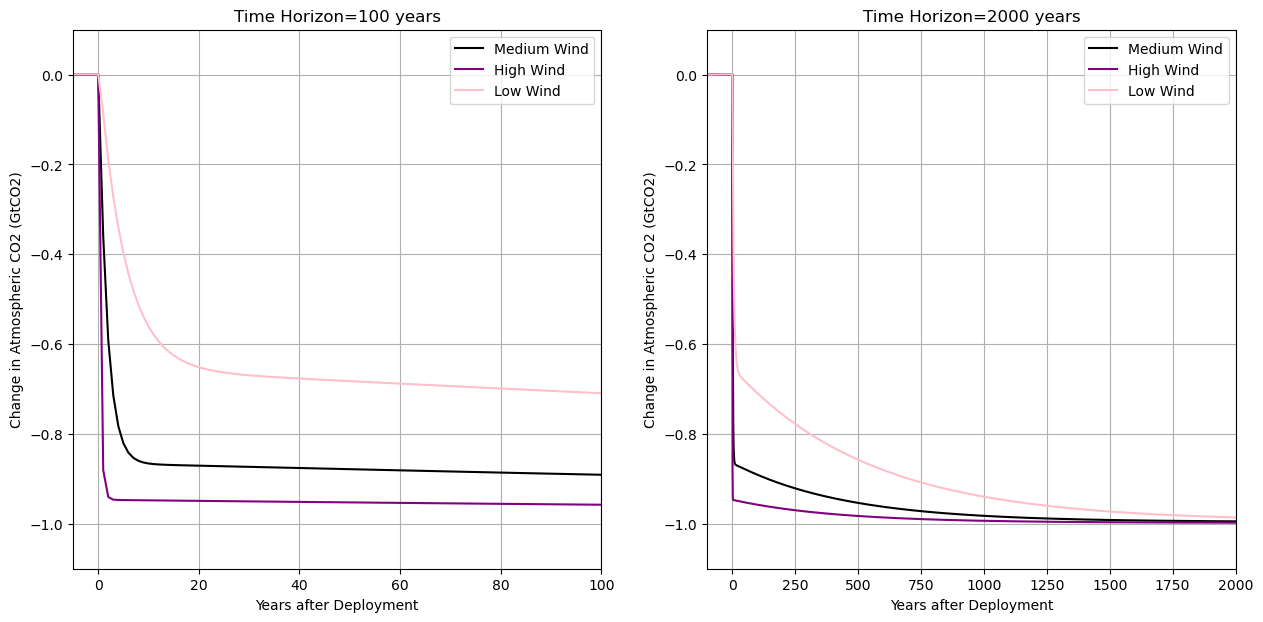

In [4]:
def plot_figure1_data():
    plt.plot(DOR_concentrationDriven.years_after_deployment,
         DOR_concentrationDriven.implied_delta_atmos_co2_GtCO2,'-k',label='Medium Wind')
    plt.plot(DOR_concentrationDriven_highWind.years_after_deployment,
             DOR_concentrationDriven_highWind.implied_delta_atmos_co2_GtCO2,'-',color='purple',label='High Wind')
    plt.plot(DOR_concentrationDriven_lowWind.years_after_deployment,
             DOR_concentrationDriven_lowWind.implied_delta_atmos_co2_GtCO2,'-',color='pink',label='Low Wind')
    plt.grid()
    plt.ylabel('Change in Atmospheric CO2 (GtCO2)')
    plt.xlabel('Years after Deployment')
    plt.legend()

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Time Horizon=100 years')
plot_figure1_data()
plt.xlim([-5,100])
plt.ylim([-1.1,0.1])

plt.subplot(1,2,2)
plt.title('Time Horizon=2000 years')
plot_figure1_data()
plt.xlim([-100,2000])
plt.ylim([-1.1,0.1])

# Figure 2

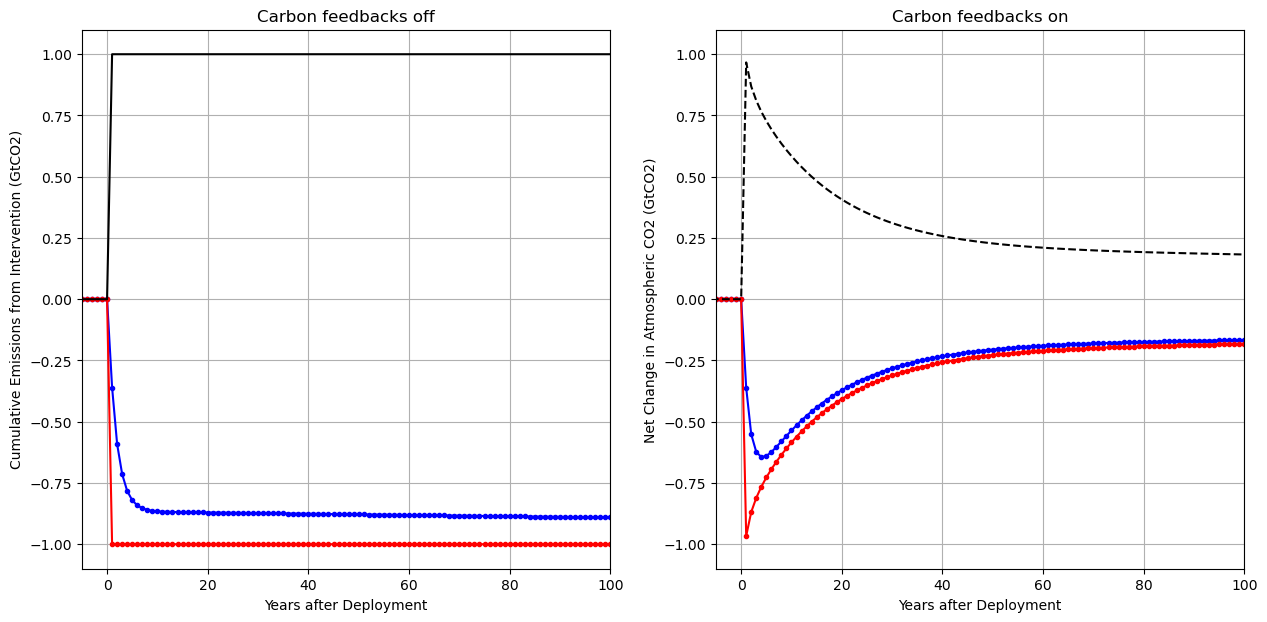

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Carbon feedbacks off')
plt.plot(DOR_concentrationDriven.years_after_deployment,
         DOR_concentrationDriven.implied_delta_atmos_co2_GtCO2,'.-b',label='DOR')
plt.plot(DAC_concentrationDriven.years_after_deployment,
         DAC_concentrationDriven.implied_delta_atmos_co2_GtCO2,'.-r',label='DAC')
plt.plot(emission_concentrationDriven.years_after_deployment,
         emission_concentrationDriven.implied_delta_atmos_co2_GtCO2,'-k',label='Emission')
plt.xlim([-5,100])
plt.ylim([-1.1,1.1])
plt.ylabel('Cumulative Emissions from Intervention (GtCO2)')
plt.xlabel('Years after Deployment')
plt.grid()

plt.subplot(1,2,2)
plt.title('Carbon feedbacks on')
plt.plot(DOR_emissionsDriven.years_after_deployment,
         DOR_emissionsDriven.delta_atmos_co2_GtCO2,'.-b',label='DOR')
plt.plot(DAC_emissionsDriven.years_after_deployment,
         DAC_emissionsDriven.delta_atmos_co2_GtCO2,'.-r',label='DAC')
plt.plot(DAC_emissionsDriven.years_after_deployment,
         -DAC_emissionsDriven.delta_atmos_co2_GtCO2,'--k',label='Emission')
plt.xlim([-5,100])
plt.ylim([-1.1,1.1])
plt.ylabel('Net Change in Atmospheric CO2 (GtCO2)')
plt.xlabel('Years after Deployment')
plt.grid()

# Figure 3

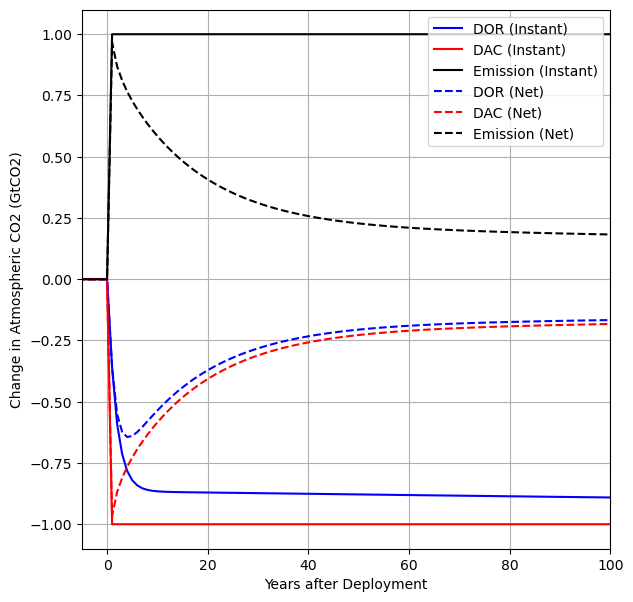

In [8]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(DOR_concentrationDriven.years_after_deployment,
         DOR_concentrationDriven.implied_delta_atmos_co2_GtCO2,'-b',label='DOR (Instant)')
plt.plot(DAC_concentrationDriven.years_after_deployment,
         DAC_concentrationDriven.implied_delta_atmos_co2_GtCO2,'-r',label='DAC (Instant)')
plt.plot(emission_concentrationDriven.years_after_deployment,
         emission_concentrationDriven.implied_delta_atmos_co2_GtCO2,'-k',label='Emission (Instant)')

plt.plot(DOR_emissionsDriven.years_after_deployment,
         DOR_emissionsDriven.delta_atmos_co2_GtCO2,'--b',label='DOR (Net)')
plt.plot(DAC_emissionsDriven.years_after_deployment,
         DAC_emissionsDriven.delta_atmos_co2_GtCO2,'--r',label='DAC (Net)')
plt.plot(DAC_emissionsDriven.years_after_deployment,
         -DAC_emissionsDriven.delta_atmos_co2_GtCO2,'--k',label='Emission (Net)')
plt.xlim([-5,100])
plt.ylim([-1.1,1.1])
plt.legend(loc='upper right')
plt.ylabel('Change in Atmospheric CO2 (GtCO2)')
plt.xlabel('Years after Deployment')
plt.grid()